# Importing the necessary libraries

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Reading the database

In [163]:
db=pd.read_csv("Project_database_No_Billboard.csv")
db.drop(columns=['Unnamed: 0'], inplace=True)

In [164]:
db.head()

,artist,danceability,valence,tempo,liveness,song,popularity,speechiness,mood,loudness,...,4th_word,4th_occurence,4th_word_percentage,5th_word,5th_occurence,5th_word_percentage,longest_word,longest_word_length,unique_word_percentage,Explicitness
0,Miley Cyrus,0.652,0.470,96.021,0.0886,Party In The U.S.A.,78.0,0.0420,NaN,-4.667,...,its,9,1.918977,party,9,1.918977,butterflies,11,19.402985,0
1,Green Day,0.268,0.416,159.779,0.6260,21 Guns,75.0,0.0355,NaN,-4.939,...,love,18,3.180212,love,14,2.473498,leatherstudded,14,5.300353,0
2,Miley Cyrus,0.336,0.299,161.010,0.1410,The Climb,72.0,0.0325,NaN,-6.354,...,as,7,2.040816,believe,6,1.749271,everything,10,22.448980,0
3,Lady Gaga,0.696,0.714,119.001,0.0842,Bad Romance,78.0,0.0363,NaN,-3.755,...,melody,10,2.032520,got,10,2.032520,replayayayay,12,12.804878,0
4,Owl City,0.513,0.461,180.118,0.1180,Fireflies,78.0,0.0439,NaN,-6.800,...,dont,10,2.949853,so,8,2.359882,everything,10,20.058997,0


## Studying the data

In [165]:
db.describe()

,danceability,valence,tempo,liveness,popularity,speechiness,loudness,duration_ms,energy,acousticness,...,2nd_word_percentage,3rd_occurence,3rd_word_percentage,4th_occurence,4th_word_percentage,5th_occurence,5th_word_percentage,longest_word_length,unique_word_percentage,Explicitness
count,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,12126.000000,1.212600e+04,12126.000000,12126.000000,...,12128.000000,12128.000000,12128.000000,12128.000000,12128.000000,12128.000000,12128.000000,12128.000000,12128.000000,12128.000000
mean,0.658992,0.501036,121.845718,0.183834,61.096404,0.114091,-6.879992,2.094029e+05,0.642099,0.263068,...,2.942335,17.164083,2.349007,14.504288,1.960496,12.745135,1.683344,9.972955,26.702580,0.065303
std,0.148988,0.230851,29.271434,0.149169,18.564550,0.115128,3.410262,7.573334e+04,0.191606,0.266706,...,2.566445,101.248153,1.995423,89.188648,1.653481,80.125984,1.428970,6.368000,27.323315,0.247071
min,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,-49.328000,3.008300e+04,0.000020,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.567000,0.325000,98.072250,0.096400,48.000000,0.040400,-8.085000,1.771742e+05,0.526000,0.043200,...,0.807398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,10.155914,0.000000
50%,0.676000,0.495000,121.012000,0.123000,70.500000,0.064000,-6.270000,2.041730e+05,0.662000,0.164000,...,2.893891,9.000000,2.409639,8.000000,2.056759,7.000000,1.804124,10.000000,19.277108,0.000000
75%,0.765000,0.679000,140.013000,0.222000,75.000000,0.143000,-4.833000,2.332745e+05,0.785000,0.422000,...,4.296875,14.000000,3.524229,12.000000,3.004292,10.000000,2.631763,12.000000,30.891420,0.000000
max,0.982000,0.990000,220.099000,0.992000,100.000000,0.966000,1.634000,4.018399e+06,1.000000,0.996000,...,33.333333,4912.000000,33.333333,4429.000000,18.987342,4071.000000,12.804878,217.000000,100.000000,1.000000


## Taking only the quantitative features

In [166]:
db_numeric = db.select_dtypes(include=['float64', 'int64'])

In [167]:
# dropping the feature we want to predict
db_numeric=db_numeric.drop(columns=['hit'])

In [168]:
print(db_numeric.isna().sum())

danceability              2
valence                   2
tempo                     2
liveness                  2
popularity                2
speechiness               2
loudness                  2
duration_ms               2
energy                    2
acousticness              2
mode                      2
instrumentalness          2
key                       2
year                      2
artist_popularity         2
artist_followers          2
words_count               0
words_average_size        0
1st_occurence             0
1st_word_percentage       0
2nd_occurence             0
2nd_word_percentage       0
3rd_occurence             0
3rd_word_percentage       0
4th_occurence             0
4th_word_percentage       0
5th_occurence             0
5th_word_percentage       0
longest_word_length       0
unique_word_percentage    0
Explicitness              0
dtype: int64


In [169]:
# replacing the NaN values with the mean 
db_filled = db_numeric.fillna(db_numeric.mean()) 

In [170]:
print(db_filled.isna().sum())

danceability              0
valence                   0
tempo                     0
liveness                  0
popularity                0
speechiness               0
loudness                  0
duration_ms               0
energy                    0
acousticness              0
mode                      0
instrumentalness          0
key                       0
year                      0
artist_popularity         0
artist_followers          0
words_count               0
words_average_size        0
1st_occurence             0
1st_word_percentage       0
2nd_occurence             0
2nd_word_percentage       0
3rd_occurence             0
3rd_word_percentage       0
4th_occurence             0
4th_word_percentage       0
5th_occurence             0
5th_word_percentage       0
longest_word_length       0
unique_word_percentage    0
Explicitness              0
dtype: int64


## Scaling the data

In [171]:
# Scaling the data for better performance 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(db_filled)

## Training an IsolationForest model to detect outliers

In [172]:
# Training IsolationForest
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X_scaled)

# Predicting outliers
db['anomaly'] = clf.predict(X_scaled)  # 1 = normal, -1 = outlier

In [173]:
# the entries that were considered "anomalies" by the IsolationForest model
filtered_rows = db[db['anomaly'] == -1]
filtered_rows

,artist,danceability,valence,tempo,liveness,song,popularity,speechiness,mood,loudness,...,4th_occurence,4th_word_percentage,5th_word,5th_occurence,5th_word_percentage,longest_word,longest_word_length,unique_word_percentage,Explicitness,anomaly
1,Green Day,0.268,0.4160,159.779,0.6260,21 Guns,75.0,0.0355,NaN,-4.939,...,18,3.180212,love,14,2.473498,leatherstudded,14,5.300353,0,-1
20,Black Eyed Peas,0.743,0.6100,127.960,0.5090,I Gotta Feeling,82.0,0.0265,Energetic,-6.375,...,21,6.645570,go,12,3.797468,yesterday,9,7.278481,0,-1
21,JAY-Z,0.491,0.8110,173.585,0.4600,Empire State Of Mind,81.0,0.3920,Energetic,-1.538,...,24,3.438395,never,24,3.438395,blackboard,10,9.169054,0,-1
28,Drake,0.395,0.5580,162.361,0.1340,Best I Ever Had,76.0,0.3750,Energetic,-2.176,...,14,2.280130,me,14,2.280130,whawhawhawhawhat,16,9.283388,0,-1
33,Bon Iver,0.329,0.1210,159.719,0.0971,Rosyln,75.0,0.0302,Sad,-13.111,...,6,1.791045,lasts,6,1.791045,bittersweet,11,17.313433,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12089,Z - Alfaro,0.575,0.9370,190.047,0.1120,Asuntos Claros,41.0,0.1080,Happy,-6.980,...,0,0.000000,Not Found,0,0.000000,Not Found,0,0.000000,0,-1
12090,Patrik Gryst,0.797,0.1710,120.018,0.9050,Trans Astral Corporation - original mix,59.0,0.0627,Energetic,-10.527,...,0,0.000000,Not Found,0,0.000000,Not Found,0,0.000000,0,-1
12113,Dulcet,0.416,0.1600,130.020,0.6610,Find You (Year in Review 2020) - Alter Future ...,43.0,0.0482,Energetic,-10.694,...,0,0.000000,Not Found,0,0.000000,Not Found,0,0.000000,0,-1
12114,Universo,0.141,0.0378,59.418,0.0983,Viento Estelar,24.0,0.0382,Calm,-29.013,...,0,0.000000,Not Found,0,0.000000,Not Found,0,0.000000,0,-1


## Plotting the results

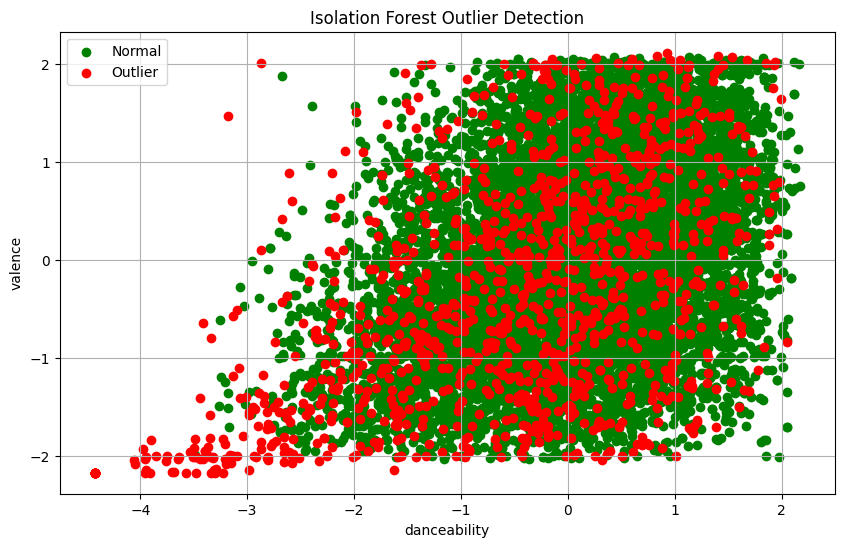

In [174]:
# Plotting using only the first two features to check results

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[db['anomaly'] == 1][:, 0], X_scaled[db['anomaly'] == 1][:, 1], c='green', label='Normal')
plt.scatter(X_scaled[db['anomaly'] == -1][:, 0], X_scaled[db['anomaly'] == -1][:, 1], c='red', label='Outlier')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel(db_numeric.columns[0])
plt.ylabel(db_numeric.columns[1])
plt.legend()
plt.grid(True)
plt.show()

## Detecting outliers using Boxplots

In [175]:
numeric_cols = db.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['danceability', 'valence', 'tempo', 'liveness', 'popularity',
       'speechiness', 'loudness', 'duration_ms', 'energy', 'acousticness',
       'mode', 'instrumentalness', 'key', 'year', 'artist_popularity',
       'artist_followers', 'hit', 'words_count', 'words_average_size',
       '1st_occurence', '1st_word_percentage', '2nd_occurence',
       '2nd_word_percentage', '3rd_occurence', '3rd_word_percentage',
       '4th_occurence', '4th_word_percentage', '5th_occurence',
       '5th_word_percentage', 'longest_word_length', 'unique_word_percentage',
       'Explicitness', 'anomaly'],
      dtype='object')

In [176]:
# removing NA values in numerical columns
db.loc[:,numeric_cols]=db.loc[:,numeric_cols].fillna(db.loc[:,numeric_cols].mean()) 

In [177]:
db.isna().sum()

artist                       2
danceability                 0
valence                      0
tempo                        0
liveness                     0
song                         2
popularity                   0
speechiness                  0
mood                      2699
loudness                     0
duration_ms                  0
energy                       0
release_date                 2
acousticness                 0
mode                         0
instrumentalness             0
key                          0
year                         0
artist_genre              3573
artist_popularity            0
artist_followers             0
hit                          0
words_count                  0
words_average_size           0
1st_word                     0
1st_occurence                0
1st_word_percentage          0
2nd_word                     1
2nd_occurence                0
2nd_word_percentage          0
3rd_word                     0
3rd_occurence                0
3rd_word

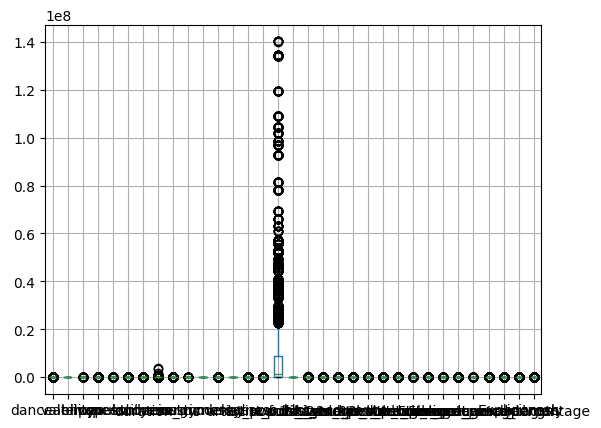

In [ ]:
db.boxplot(column=list(numeric_cols))
plt.show()

In [ ]:
# detecting outliers:
# initializing a new df to store true if entry if an outlier, false otherwise

outlier_df = pd.DataFrame(index=db.index, columns=numeric_cols)
Qs=[]

for col in numeric_cols:
    Q1 = db[col].quantile(0.25)
    Q3 = db[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    
    upper_bound = Q3 + 1.5 * IQR

    Qs.append([float(Q1),float(Q3)])

    
    # Marking outliers as values that are smaller than the lower bound or greater than the upper bound
    outlier_df[col] = (db[col] < lower_bound) | (db[col] > upper_bound)

outlier_df is a dataframe with our numerical columns and with value=True if the entry is an outlier, False otherwise

In [180]:
outlier_df.head()

,danceability,valence,tempo,liveness,popularity,speechiness,loudness,duration_ms,energy,acousticness,...,3rd_occurence,3rd_word_percentage,4th_occurence,4th_word_percentage,5th_occurence,5th_word_percentage,longest_word_length,unique_word_percentage,Explicitness,anomaly
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [181]:
# example: number of outliers in the column "danceability"
sum(outlier_df["danceability"]==True)

158

In [182]:
# example to see the values of danceability that were considered outliers 
db[outlier_df["danceability"]==True]["danceability"]

1        0.268
26       0.268
97       0.247
140      0.221
283      0.215
         ...  
12025    0.160
12050    0.252
12064    0.241
12068    0.190
12114    0.141
Name: danceability, Length: 158, dtype: float64

## Replacing outliers with Min and Max values
We Manually looked into each feature to see what method of dealing with the outliers makes most sense. <br>
We replaced the outliers of the following features with the Min and Max values: <br>
* All audio features <br>
* Song and Artist popularity <br>

In [183]:
outlier_df.columns

Index(['danceability', 'valence', 'tempo', 'liveness', 'popularity',
       'speechiness', 'loudness', 'duration_ms', 'energy', 'acousticness',
       'mode', 'instrumentalness', 'key', 'year', 'artist_popularity',
       'artist_followers', 'hit', 'words_count', 'words_average_size',
       '1st_occurence', '1st_word_percentage', '2nd_occurence',
       '2nd_word_percentage', '3rd_occurence', '3rd_word_percentage',
       '4th_occurence', '4th_word_percentage', '5th_occurence',
       '5th_word_percentage', 'longest_word_length', 'unique_word_percentage',
       'Explicitness', 'anomaly'],
      dtype='object')

In [184]:
db_before_fix=db.copy()
db_before_fix.head()

,artist,danceability,valence,tempo,liveness,song,popularity,speechiness,mood,loudness,...,4th_occurence,4th_word_percentage,5th_word,5th_occurence,5th_word_percentage,longest_word,longest_word_length,unique_word_percentage,Explicitness,anomaly
0,Miley Cyrus,0.652,0.470,96.021,0.0886,Party In The U.S.A.,78.0,0.0420,NaN,-4.667,...,9,1.918977,party,9,1.918977,butterflies,11,19.402985,0,1
1,Green Day,0.268,0.416,159.779,0.6260,21 Guns,75.0,0.0355,NaN,-4.939,...,18,3.180212,love,14,2.473498,leatherstudded,14,5.300353,0,-1
2,Miley Cyrus,0.336,0.299,161.010,0.1410,The Climb,72.0,0.0325,NaN,-6.354,...,7,2.040816,believe,6,1.749271,everything,10,22.448980,0,1
3,Lady Gaga,0.696,0.714,119.001,0.0842,Bad Romance,78.0,0.0363,NaN,-3.755,...,10,2.032520,got,10,2.032520,replayayayay,12,12.804878,0,1
4,Owl City,0.513,0.461,180.118,0.1180,Fireflies,78.0,0.0439,NaN,-6.800,...,10,2.949853,so,8,2.359882,everything,10,20.058997,0,1


In [185]:
db_before_fix[outlier_df["danceability"]==True]["danceability"]

1        0.268
26       0.268
97       0.247
140      0.221
283      0.215
         ...  
12025    0.160
12050    0.252
12064    0.241
12068    0.190
12114    0.141
Name: danceability, Length: 158, dtype: float64

In [186]:
cols=["danceability", "valence", "tempo", "liveness", "speechiness", "loudness", "energy", "acousticness", "mode", "instrumentalness", "key", "popularity", "artist_popularity"]

for i in range(len(numeric_cols)):
    if numeric_cols[i] in cols:     
        min_value=Qs[i][0]
        
        max_value=Qs[i][1]
      
        db.loc[((outlier_df[numeric_cols[i]]==True) & (db[numeric_cols[i]] > max_value)), numeric_cols[i]] = max_value
        db.loc[((outlier_df[numeric_cols[i]]==True) & (db[numeric_cols[i]] < min_value)), numeric_cols[i]] = min_value

In [187]:
# testing
numeric_cols
Qs[2]
db[outlier_df["tempo"]==True]["tempo"]

869      140.01300
1006      98.07475
1533      98.07475
1604      98.07475
1629      98.07475
1858      98.07475
2292     140.01300
2392      98.07475
2662     140.01300
2873     140.01300
3234     140.01300
3682     140.01300
3757     140.01300
3805     140.01300
3950     140.01300
4101      98.07475
4785      98.07475
5045     140.01300
5205     140.01300
5301     140.01300
5662     140.01300
5702     140.01300
6279     140.01300
6812     140.01300
6815     140.01300
7088      98.07475
7283      98.07475
7291      98.07475
7293     140.01300
7434     140.01300
7756     140.01300
7851      98.07475
8934     140.01300
8956      98.07475
9220     140.01300
9622     140.01300
9819     140.01300
10345    140.01300
10430    140.01300
10469    140.01300
10590    140.01300
10620    140.01300
10703    140.01300
10713    140.01300
10826    140.01300
11053    140.01300
11447     98.07475
11888    140.01300
11913    140.01300
12117    140.01300
Name: tempo, dtype: float64

## Replacing outliers with the median

For the lyrics-related features, we decided to replcase the outliers with the median because for instance, if the words average size value for a song is zero, it is a high chance there's something wrong with the lyrics fetching


In [188]:
sum(outlier_df["words_count"]==True)

724

In [189]:
cols2=["words_count", "words_average_size", "1st_occurence", "1st_word_percentage", "2nd_occurence", "2nd_word_percentage", "3rd_occurence", "3rd_word_percentage", "4th_occurence", "4th_word_percentage","5th_occurence", "5th_word_percentage", "longest_word_length", "unique_word_percentage" ]

for i in range(len(numeric_cols)):
    if numeric_cols[i] in cols2:     
        med=db[numeric_cols[i]].median()
        db.loc[((outlier_df[numeric_cols[i]]==True)), numeric_cols[i]] = med

for i in range(len(numeric_cols)):
    if numeric_cols[i] in cols2:     
        med=db[numeric_cols[i]].median()
        db.loc[((db[numeric_cols[i]]==0)), numeric_cols[i]] = med

In [190]:
# manually looked into each outlier and decided what to do based on what suited each feature:
# audio features: replace with max min 
# artist_followers: keep
# popularity: max min
# duration : leave them 
# year : dont do anything
# key , mode : dont do anything
# artist popularity : max min  
# word count: check if duration ms is > avg (3 mins) replace with max, if < , replace with min 
# words avergae size; if it's 0 --> no lyrics --> replace with the mean of the col
# rest of lyrics features --> replace with mean for the same reason

In [197]:
db.head()

,artist,danceability,valence,tempo,liveness,song,popularity,speechiness,mood,loudness,...,4th_occurence,4th_word_percentage,5th_word,5th_occurence,5th_word_percentage,longest_word,longest_word_length,unique_word_percentage,Explicitness,anomaly
0,Miley Cyrus,0.652,0.470,96.021,0.0886,Party In The U.S.A.,78.0,0.0420,NaN,-4.667,...,9,1.918977,party,9,1.918977,butterflies,11,19.402985,0,1
1,Green Day,0.567,0.416,159.779,0.2220,21 Guns,75.0,0.0355,NaN,-4.939,...,18,3.180212,love,14,2.473498,leatherstudded,14,5.300353,0,-1
2,Miley Cyrus,0.336,0.299,161.010,0.1410,The Climb,72.0,0.0325,NaN,-6.354,...,7,2.040816,believe,6,1.749271,everything,10,22.448980,0,1
3,Lady Gaga,0.696,0.714,119.001,0.0842,Bad Romance,78.0,0.0363,NaN,-3.755,...,10,2.032520,got,10,2.032520,replayayayay,12,12.804878,0,1
4,Owl City,0.513,0.461,180.118,0.1180,Fireflies,78.0,0.0439,NaN,-6.800,...,10,2.949853,so,8,2.359882,everything,10,20.058997,0,1


In [193]:
print(db.isna().sum())

artist                       2
danceability                 0
valence                      0
tempo                        0
liveness                     0
song                         2
popularity                   0
speechiness                  0
mood                      2699
loudness                     0
duration_ms                  0
energy                       0
release_date                 2
acousticness                 0
mode                         0
instrumentalness             0
key                          0
year                         0
artist_genre              3573
artist_popularity            0
artist_followers             0
hit                          0
words_count                  0
words_average_size           0
1st_word                     0
1st_occurence                0
1st_word_percentage          0
2nd_word                     1
2nd_occurence                0
2nd_word_percentage          0
3rd_word                     0
3rd_occurence                0
3rd_word

In [194]:
db[outlier_df["words_count"]==True]["words_count"]

108      316
127      316
133      316
390      316
421      316
        ... 
11048    316
11066    316
11087    316
11090    316
11091    316
Name: words_count, Length: 724, dtype: int64

In [207]:
db.to_csv("Project_Database_NoOutliers.csv")

In [196]:
db.columns

Index(['artist', 'danceability', 'valence', 'tempo', 'liveness', 'song',
       'popularity', 'speechiness', 'mood', 'loudness', 'duration_ms',
       'energy', 'release_date', 'acousticness', 'mode', 'instrumentalness',
       'key', 'year', 'artist_genre', 'artist_popularity', 'artist_followers',
       'hit', 'words_count', 'words_average_size', '1st_word', '1st_occurence',
       '1st_word_percentage', '2nd_word', '2nd_occurence',
       '2nd_word_percentage', '3rd_word', '3rd_occurence',
       '3rd_word_percentage', '4th_word', '4th_occurence',
       '4th_word_percentage', '5th_word', '5th_occurence',
       '5th_word_percentage', 'longest_word', 'longest_word_length',
       'unique_word_percentage', 'Explicitness', 'anomaly'],
      dtype='object')

In [206]:
db[db["words_count"]<20]

,artist,danceability,valence,tempo,liveness,song,popularity,speechiness,mood,loudness,...,4th_occurence,4th_word_percentage,5th_word,5th_occurence,5th_word_percentage,longest_word,longest_word_length,unique_word_percentage,Explicitness,anomaly
288,Christina Perri,0.349,0.0886,74.541,0.1200,Jar of Hearts,75.0,0.0316,Sad,-6.142,...,8,2.056657,Not Found,7,1.804124,lyrics,6,19.277108,0,1
820,Bryson Tiller,0.765,0.1900,97.001,0.0963,Don't,80.0,0.1960,NaN,-5.556,...,8,2.056657,Not Found,7,1.804124,lyrics,6,19.277108,0,1
871,Ellie Goulding,0.567,0.2750,189.857,0.1250,"Love Me Like You Do - From ""Fifty Shades Of Grey""",80.0,0.0484,Energetic,-6.646,...,8,2.056657,Not Found,7,1.804124,lyrics,6,19.277108,0,1
877,Justin Bieber,0.845,0.7930,125.020,0.0811,What Do You Mean?,79.0,0.0956,Happy,-8.118,...,8,2.056657,Not Found,7,1.804124,lyrics,6,19.277108,0,-1
894,Galantis,0.506,0.3830,126.008,0.0856,Runaway (U & I),77.0,0.0469,Energetic,-4.119,...,8,2.056657,Not Found,7,1.804124,lyrics,6,19.277108,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11077,Michele Morrone,0.451,0.1580,81.326,0.0983,Hard For Me,68.0,0.0360,Sad,-11.764,...,8,2.056657,Not Found,7,1.804124,lyrics,6,19.277108,0,-1
11095,The Legend,0.590,0.6340,188.097,0.1110,la rosa roja intrumental,39.0,0.1030,Happy,-12.243,...,8,2.056657,Not Found,7,1.804124,lyrics,6,19.277108,0,-1
11097,Jon Gurd,0.571,0.3390,129.763,0.1940,Lion - Mixed,27.0,0.0465,Energetic,-5.083,...,8,2.056657,Not Found,7,1.804124,lyrics,6,19.277108,0,1
11098,Nightwish,0.543,0.2720,104.006,0.1110,How's the Heart?,56.0,0.0278,Energetic,-8.649,...,8,2.056657,Not Found,7,1.804124,lyrics,6,19.277108,0,1
